In [16]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import easyocr

ModuleNotFoundError: No module named 'easyocr'

NameError: name 'easyocr' is not defined

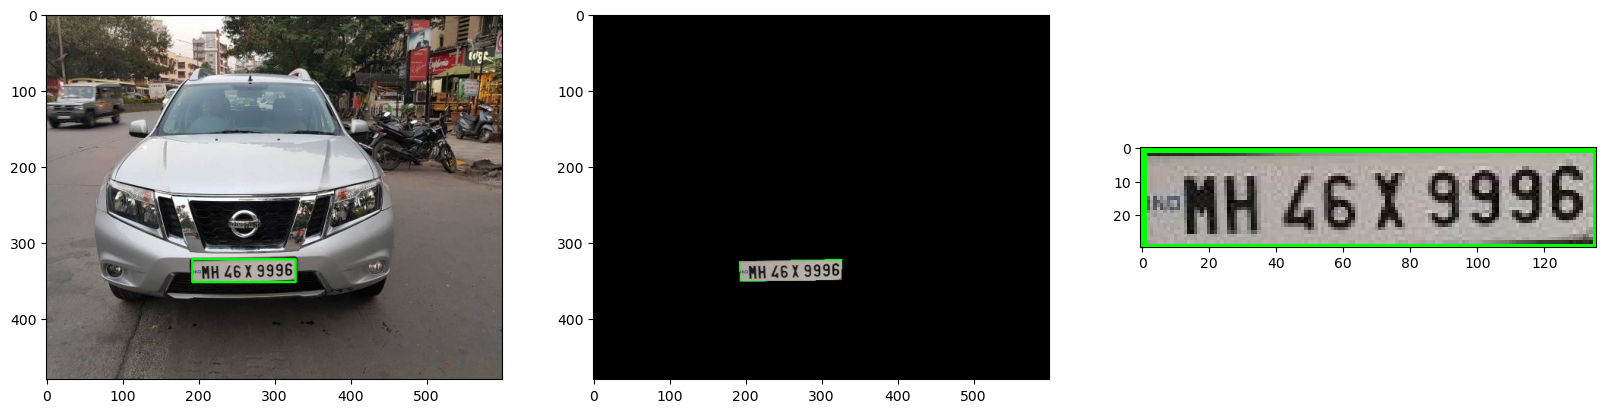

In [11]:
img=cv2.imread('number_plate/google_images/0a0d1748-48cd-4114-90cb-b5baf0b3cbe4___3e7fd381-0ae5-4421-8a70-279ee0ec1c61_147274518_15141875973_large.jpg')
resize = cv2.resize(img, (250, 250))
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
image_canny = cv2.Canny(image_blur, 150, 200)
contours, hierarchy = cv2.findContours(image_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
for c in contours:
    perimeter = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02*perimeter, True)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        break
mask = np.zeros(image_gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [approx], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
Cropped = img[topx:bottomx+1, topy:bottomy+1]
plt.figure(figsize=(20,10))
plt.subplot(1,3,2),plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,1),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3),plt.imshow(cv2.cvtColor(Cropped,cv2.COLOR_BGR2RGB))
ocr = easyocr.Reader(['en'])
ocr = ocr.readtext(Cropped)
ocr